In [4]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
in_names = {0: 'Dwayne\nJohnson', 1: 'Chris\nHemsworth', 2: 'Robert\nDowney Jr.', 3: 'Akshay\nKumar', 4: 'Jackie\nChan',
           5:'Bradley\nCooper', 6:'Adam\nSandler', 7:'Scarlett\nJohansson', 8:'Sofia\nVergara', 9:'Chris\nEvans'}

In [6]:
distance = [[0, 2, 2, 3, 3, 3, 3, 2, -1, 2],
 [0, 0, 1, 3, -1, 3, 3, 1, 3, 1],
 [0, 0, 0, -1, -1, 3, -1, 1, 3, 1],
 [0, 0, 0, 0, -1, 2, 3, 2, -1, 2],
 [0, 0, 0, 0, 0, -1, -1, -1, -1, -1],
 [0, 0, 0, 0, 0, 0, 3, 3, 3, 2],
 [0, 0, 0, 0, 0, 0, 0, 2, 3, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, -1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [113]:
def build_graph(level, color):
    labels = dict()
    
    pairs = itertools.combinations(numbers, 2)
    G = nx.Graph()
    G.add_nodes_from(numbers)

    for i in pairs:
        if distance[i[0]][i[1]] == 1:
            G.add_edge(i[0], i[1], color='red', weight=1)
        elif distance[i[0]][i[1]] == 2:
            G.add_edge(i[0], i[1], color='blue', weight=2)
        elif distance[i[0]][i[1]] == 3:
            G.add_edge(i[0], i[1], color='green', weight=3)

    pos = nx.circular_layout(G)

    edges = G.edges()
    nodes = G.nodes()
    colors = [G[u][v]['color'] for u,v in edges]
    
    for e in G.edges:
        labels[e] = str(G[e[0]][e[1]]['weight'])


    options = {"edgecolors": "tab:gray", "node_size": 50, "alpha": 0.5}
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, alpha=0.5, edge_color=colors) 
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    #nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, alpha=0.5) 

    nx.draw_networkx_labels(G, pos, labels=in_names, font_size=12)

    plt.axis("off")
    plt.show()

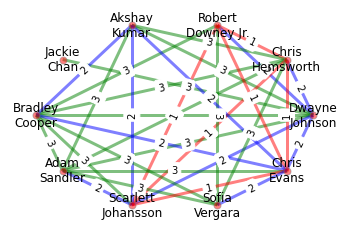

In [114]:
build_graph(1, 'red')

In [100]:
?nx.draw_networkx_edge_labels

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup
import re
import urllib

In [23]:
url1 = 'https://www.imdb.com/name/nm0425005/'  # Dwayne Johnson
response = requests.get(url1)
assert response.status_code == 200
soup = BeautifulSoup(response.text, "html.parser")

In [24]:
def get_movies_by_actor_soup(actor_page_soup, num_of_movies_limit=None, logging=True):
    movie_list = []
    main_url = 'https://imdb.com'
    count = 1

    films = actor_page_soup.find_all('div', attrs={'class': ['filmo-row odd', 'filmo-row even']})

    if not films:
        return []

    for film in films:
        tag_id = film["id"].split('-')

        if tag_id[0] in ['actress', 'actor']:
            f_attr = film.find_all('a')
            if len(f_attr) == 1 and len(film.find_all(string=re.compile("\("))) == 0:
                film_name = f_attr[0].text
                film_link = f_attr[0]['href']
                if logging:
                    print((film_name, urllib.parse.urljoin(main_url, film_link)))

                movie_list.append((film_name, urllib.parse.urljoin(main_url, film_link)))
                count += 1

                if num_of_movies_limit:
                    if count > num_of_movies_limit:
                        break

    return movie_list

In [25]:
result = get_movies_by_actor_soup(soup)

('Red Notice', 'https://imdb.com/title/tt7991608/')
('Jungle Cruise', 'https://imdb.com/title/tt0870154/')
('Jumanji: The Next Level', 'https://imdb.com/title/tt7975244/')
('Fast & Furious Presents: Hobbs & Shaw', 'https://imdb.com/title/tt6806448/')
('Skyscraper', 'https://imdb.com/title/tt5758778/')
('Rampage', 'https://imdb.com/title/tt2231461/')
('Jumanji: Welcome to the Jungle', 'https://imdb.com/title/tt2283362/')
('Baywatch', 'https://imdb.com/title/tt1469304/')
('The Fate of the Furious', 'https://imdb.com/title/tt4630562/')
('Central Intelligence', 'https://imdb.com/title/tt1489889/')
('Jem and the Holograms', 'https://imdb.com/title/tt3614530/')
('San Andreas', 'https://imdb.com/title/tt2126355/')
('Furious 7', 'https://imdb.com/title/tt2820852/')
('Hercules', 'https://imdb.com/title/tt1267297/')
('Furious 6', 'https://imdb.com/title/tt1905041/')
('Pain & Gain', 'https://imdb.com/title/tt1980209/')
('Empire State', 'https://imdb.com/title/tt2171867/')
('G.I. Joe: Retaliation'

In [26]:
url = 'https://imdb.com/title/tt7991608/'
response = requests.get(url)
assert response.status_code == 200
soup = BeautifulSoup(response.text, "html.parser")

In [27]:
section = soup.find('div', attrs={'class': 'ipc-html-content ipc-html-content--base'})

In [29]:
descr = section.find('div').text

In [31]:
print(descr)

When an Interpol-issued Red Notice the highest level warrant to hunt and capture the world's most wanted goes out, the FBI's top profiler John Hartley (Dwayne Johnson) is on the case. His global pursuit finds him smack dab in the middle of a daring heist where he's forced to partner with the world's greatest art thief Nolan Booth (Ryan Reynolds) in order to catch the world's most wanted art thief, "The Bishop" (Gal Gadot). The high-flying adventure that ensues takes the trio around the world, across the dance floor, trapped in a secluded prison, into the jungle and, worst of all for them, constantly into each other's company. —Netflix


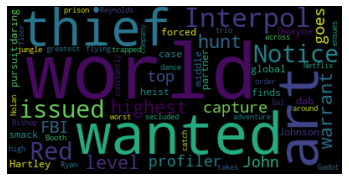

In [32]:
# Start with one review:
text = descr

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

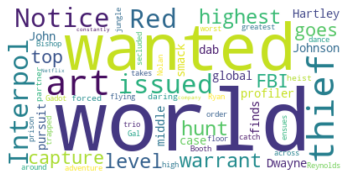

In [33]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["—Netflix"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()